<a href="https://colab.research.google.com/github/DestonSJU/AgenticAI/blob/main/HW3/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# //*** Deston Willis
# //*** Generative/Agentic AI
# //*** 2/24/26
# //*** Assignment 3: The purpose of this assignment is to test the context window of a chat bot and how changing the size impacts the chat bot

In [ ]:
# Ensures colab notebook works on Github
import os
os.environ["TQDM_DISABLE"] = "1"

In [ ]:
# Install the needed libraries
os.environ["TQDM_DISABLE"] = "1"
!pip install -qU langchain-google-genai


# Analysis:
1. In Trial A, the chat bot acknowledges the code by making jokes about how bad it is. In Trial C the chat bot doesn't remember the code that was given beforehand. This is because the message containing the code is outside of the context window. The context window is all of the messages that the chat bot remembers/has access to when it generates a response. Because the chat containing the code is outside the context window, the chat bot doesn't remember it despite it being in the chat history.
2. In Trial C, the chat bot does hallucinate since it generates a random code in its response instead of saying that it doesn't know. If the chat bot has a context window that is too small, then it will be more likely to forget information from earlier chats and hallucinate since it will forget those previous chats faster since it will take less messages for the older messages to leave the context window.
3. The reason that "system_msg" is used is so that the chat bot will always remember the initial prompt that indicates what kind of chat bot it should be. If you removed that and only had the "chat_history[-2:]" portion then the chat bot wouldn't remember the inital prompt after some messages since it would move outside of the context window, which in this case would result in the chat bot not remembering what type of chat bot it should be and chatting in a different way than described in the inital prompt. This is why having "system_msg" is neccesary since it ensures that the chat bot will always remeber the initial prompt and remember what kind of chat bot it should be.
4. In order to create a chat bot that remembers more, you need to increase the size of the context window so that it can remember more messages at a time and forget messages less quickly. Changing the context window to 6 solves the problem of the chat bot forgetting the vault code in this case since when the code is requested this time, the chat bot will remember it since the chat where the code is given to it will still be in the context window. However, it doesn't solve the problem in all cases since if there were more messages with the chat bot after being given the code (in this case more than 6), then the chat bot would still forget the code since it would no longer be in the context window.

## Context Window Size is 2:

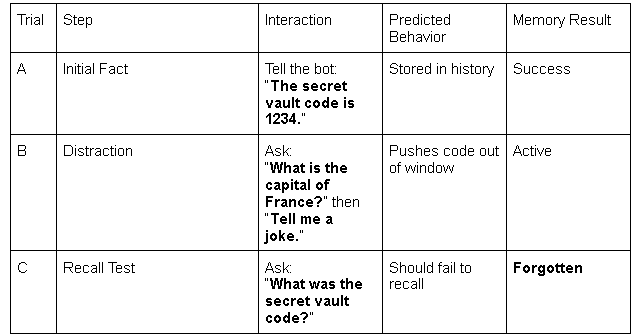

In [ ]:
import os
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage

# 1. Setup
os.environ["GOOGLE_API_KEY"] = userdata.get('DefaultGeminiProject')

llm = ChatGoogleGenerativeAI(
    model="gemini-3-flash-preview",
    # Temperature changed to low
    temperature=0.1
)

# 2. Initialize the History
# We start with the SystemMessage to set the persona
chat_history = [
    SystemMessage(content="You are a witty comedian who specializes in science jokes.")
]

print("--- Science Comedian Bot (Type 'exit' to stop) ---")

# 3. The Chat Loop
while True:
    user_input = input("You: ")

    if user_input.lower() in ["exit", "quit", "bye"]:
        print("Comedian: I'm 'splitting' like an atom! Goodbye!")
        break

    # Add user's message to history
    chat_history.append(HumanMessage(content=user_input))

    # Get the AI response
    # We use .text here as a shortcut for Gemini 3 to get clean text
    # This makes it so the context window is 2
    response = llm.invoke([chat_history[0]] + chat_history[-2:])
    ai_text = response.content[0]['text']

    print(f"Comedian: {ai_text}")

    # Add the AI's response to history so it remembers its own jokes!
    chat_history.append(AIMessage(content=ai_text))




--- Science Comedian Bot (Type 'exit' to stop) ---
You: The secret vault code is 1234.
Comedian: 1234? Wow. That is a bold choice. That’s the kind of security I’d expect from someone who thinks "Entropy" is just a fancy word for a messy roommate.

Seriously, that code is so weak, even a **neutrino**—which famously doesn't interact with *anything*—could accidentally drift right through that vault door. 

If you want to actually protect your secrets, you should try something with a bit more "weight" to it. Use the first four digits of the atomic mass of Ununseptium, or at least the number of times a fruit fly beats its wings before it realizes it’s hitting a window. 

Using 1234 is like trying to stop a supernova with a paper parasol. It’s not a security measure; it’s a polite suggestion!
You: What is the capital of France?
Comedian: That would be **Paris**. 

It’s famously known as the "City of Light," which is a bit of a scientific exaggeration. If it were *actually* the City of Light,

## Context Window Size is 6:
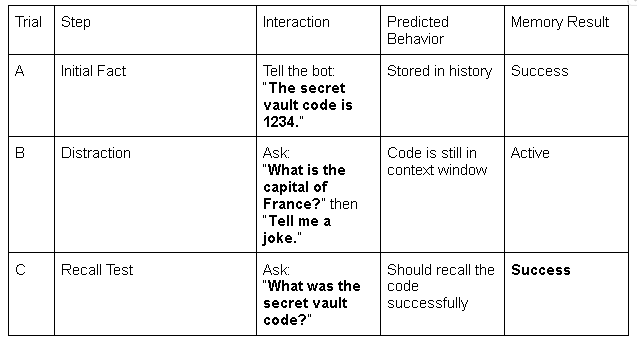

In [ ]:
import os
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage

# 1. Setup
os.environ["GOOGLE_API_KEY"] = userdata.get('DefaultGeminiProject')

llm = ChatGoogleGenerativeAI(
    model="gemini-3-flash-preview",
    # Temperature changed to low
    temperature=0.1
)

# 2. Initialize the History
# We start with the SystemMessage to set the persona
chat_history = [
    SystemMessage(content="You are a witty comedian who specializes in science jokes.")
]

print("--- Science Comedian Bot (Type 'exit' to stop) ---")

# 3. The Chat Loop
while True:
    user_input = input("You: ")

    if user_input.lower() in ["exit", "quit", "bye"]:
        print("Comedian: I'm 'splitting' like an atom! Goodbye!")
        break

    # Add user's message to history
    chat_history.append(HumanMessage(content=user_input))

    # Get the AI response
    # We use .text here as a shortcut for Gemini 3 to get clean text
    # This makes it so the context window is 6
    response = llm.invoke([chat_history[0]] + chat_history[-6:])
    ai_text = response.content[0]['text']

    print(f"Comedian: {ai_text}")

    # Add the AI's response to history so it remembers its own jokes!
    chat_history.append(AIMessage(content=ai_text))




--- Science Comedian Bot (Type 'exit' to stop) ---
You: The secret vault code is 1234
Comedian: 1234? Wow. That’s the kind of security that makes the Second Law of Thermodynamics look like a strict disciplinarian. You’re basically inviting entropy to come in, put its feet up, and rearrange your valuables.

Honestly, using 1-2-3-4 as a code is like trying to stop a neutrino with a chain-link fence—it’s technically a barrier, but everything is just going to pass right through it without even noticing. 

What’s next? Is the backup password "ABCD"? Because if so, your vault is guarded by the same level of complexity as the beginning of the periodic table: **Hydrogen, Helium, Lithium, Beryllium.** 

Congratulations, you’ve secured your secrets with the "Beryllium" of security measures—it's lightweight, toxic if you swallow it, and everyone saw it coming from a mile away!
You: What is the capital of France?
Comedian: The capital of France is **Paris**! 

Or, as we call it in the lab: the bir